# PROYECTO MODELOS AVANZADOS 1 - GRUPO 5

## Integrantes:

* Denis Leonardo Jaimes Campos | Código: 202027884
* Esteban López Zúñiga | Código: 200914313
* Oscar Hernando Ayala Nino | Código: 201920024
* Sebastián Camilo Camargo Bello | Código: 201014774
* Sindy Lorena Murcia Florez | Código: 202028060

# Caso de estudio: Consumo de energía en región de la India

## 2. Descripción de los datos y pregunta clave:

La base cuenta con 498 registros históricos del consumo diario de energía (medido en kWh-hora) per cápita para cada uno de los 9 estados que conforman la región de NR en la India. Esta región, de acuerdo con noticias recientes, ha sufrido de caídas en los servicios de energía por el alto consumo y la limitada capacidad de la planta eléctrica que actualmente abastece la región.

En este sentido, se busca realizar un análisis con estos datos (de 2019 a 2020) con el fin de determinar los periodos/temporadas de mayor consumo en el año, esto en pro de que el gobierno regional pueda tomar decisiones y establecer políticas que incentiven actividades de baja demanda de energía. Así, se plantea la siguiente pregunta de negocios:

### ¿Cuáles son las temporadas de mayor consumo de energía en la región de NR?

In [1]:
# Cargue de la información:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/Proyecto_1/bd_proyecto_1_grupo_5.csv',
                sep=',')

In [3]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [4]:
# Se filtran los estados de la región NR y se ajusta el formato de fecha

df = df.query('Regions == "NR" ')
df.Dates = pd.to_datetime(df.Dates)

# Se crea tabla pivot:
df =  pd.pivot_table(df, index='Dates', columns='States', values='Usage')

# Se crea el total de consumo por los estados de la región NR
df['consumo_total'] = df.sum(axis=1)

In [5]:
df.head()

States,Chandigarh,Delhi,HP,Haryana,J&K,Punjab,Rajasthan,UP,Uttarakhand,consumo_total
Dates,,,,,,,,,,
2019-01-07,4.8,103.8,24.2,157.5,34.8,163.9,180.9,379.4,33.9,1083.2
2019-01-08,5.5,99.3,29.4,140.6,44.9,206.1,223.7,384.1,42.6,1176.2
2019-01-09,5.4,113.9,30.5,200.4,39.1,224.0,240.5,350.6,40.2,1244.6
2019-01-10,3.9,80.7,27.8,142.9,39.9,118.9,208.4,316.5,34.9,973.9
2019-01-11,2.4,52.4,12.1,79.7,40.7,78.2,159.5,271.0,20.1,716.1


In [6]:
df.tail()

States,Chandigarh,Delhi,HP,Haryana,J&K,Punjab,Rajasthan,UP,Uttarakhand,consumo_total
Dates,,,,,,,,,,
2020-05-19,4.1,71.7,30.1,131.6,50.2,120.5,250.3,290.9,39.3,988.7
2020-05-20,4.1,70.7,30.5,131.6,49.7,123.8,251.7,292.0,39.4,993.5
2020-05-21,4.2,73.4,31.1,133.0,51.1,126.0,249.7,295.5,40.1,1004.1
2020-05-22,3.9,62.0,30.3,131.6,50.7,127.2,247.4,295.4,39.2,987.7
2020-05-23,3.5,72.1,27.5,122.9,49.9,121.6,243.3,286.3,35.6,962.7


# 3. Entendimiento de los datos

* Estacionalidad,
* Ciclicidad,
* Autocorrelacion, 
* Comportamiento de los residuos, 
* Among others.

In [20]:
import warnings
warnings.filterwarnings('ignore')

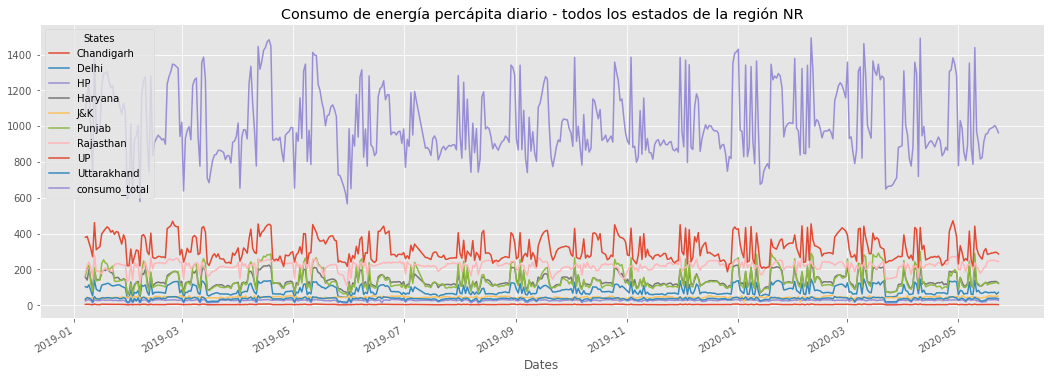

In [7]:
plt.style.use('ggplot')
df.plot(figsize=(18,6), legend=True)
plt.title('Consumo de energía percápita diario - todos los estados de la región NR');

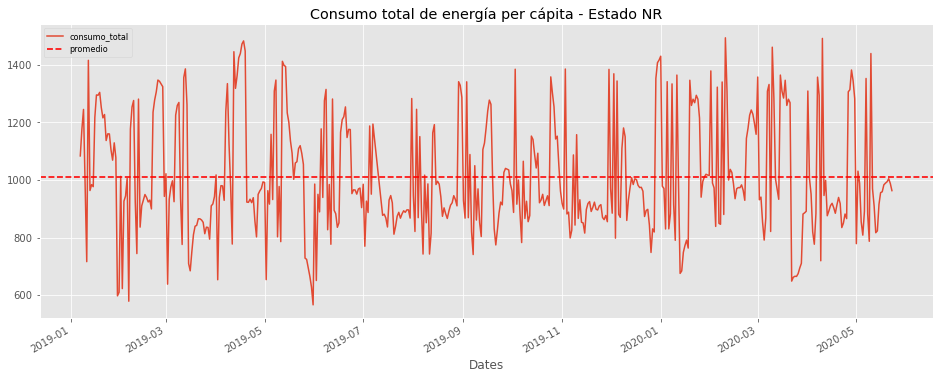

In [8]:
df['consumo_total'].plot(figsize=(16,6), grid=True)
plt.title('Consumo total de energía per cápita - Estado NR')
plt.axhline(df['consumo_total'].mean(), color='red', linewidth=1.6, linestyle="dashed", label='promedio')
plt.legend(fontsize=8);

### 3.1. Estacionalidad

Se observa el comportamiento de las diferencias para ver estacionalidad de la serie.

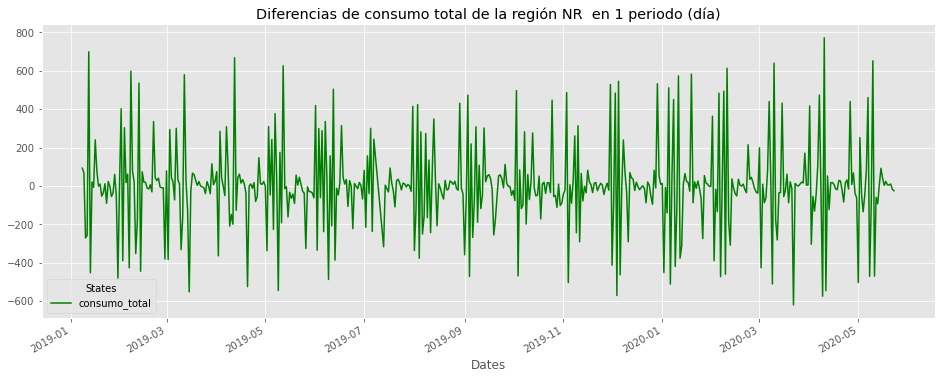

In [9]:
# Se genera la diferencia de un día para ver su comportamiento:
periodo = 1

df[['consumo_total']].diff(periodo).plot(figsize=(16,6), grid=True,color='green')
plt.title('Diferencias de consumo total de la región NR  en {} periodo (día)'.format(periodo));

Se observa como las diferencias más grandes en el consumo diario de energía de un día a otro, van teniendo 'picos' más altos despues de cierto periodo de tiempo (al rededor de 10 días)

### 3.2. Tendencia

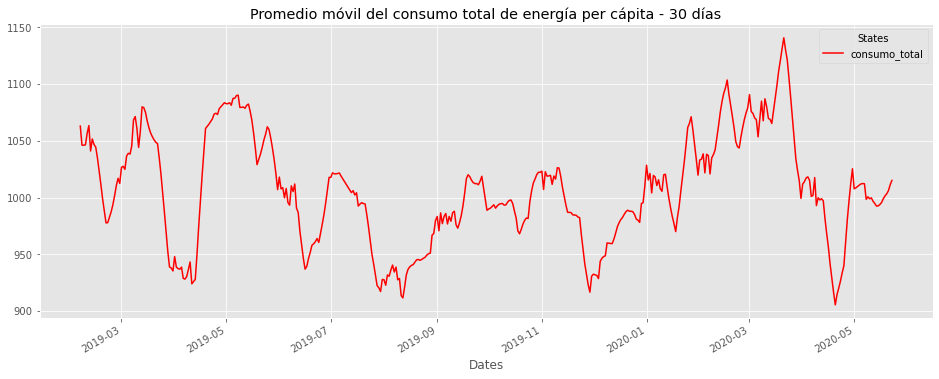

In [10]:
# Se grafica la tendidencia de la serie usando el promedio móvil

prom_movil = 30

df[['consumo_total']].rolling(prom_movil).mean().plot(figsize=(16,6), grid=True,color='red')
plt.title('Promedio móvil del consumo total de energía per cápita - {} días'.format(prom_movil));

Se observa como el promedio de consumo per cápita de energía para 30 días, presenta altibajos a lo largo del periodo de medición: Sube y baja constantemente sin una tendencia marcada.

### 3.3. Autocorrelación

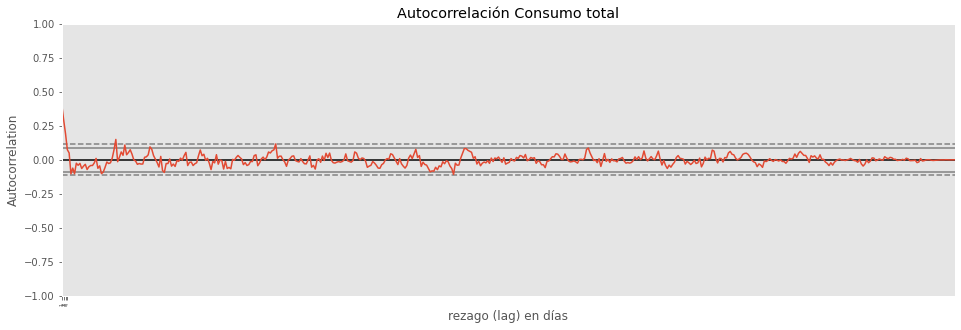

In [11]:
plt.figure(figsize=(16,5))
pd.plotting.autocorrelation_plot(df['consumo_total'])
plt.title('Autocorrelación Consumo total')
plt.xticks(np.arange(1,5), rotation=90, fontsize=5)
plt.xlabel('rezago (lag) en días');

Se observa con el gráfico de autocorrelación que la serie de consumo total de energía tiene una periodicidad de 4 días, esto dado que las autocorrelaciones para rezagos más grandes son más pequeñas (se encuentran casi todas dentro del intervalo de confianza para una autocorrelación cercana a cero.

### 3.4. Prueba de dickey-fuller para evaluar estacionariedad de la serie

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(df['consumo_total'])

(-8.990029029696228,
 6.931983070073212e-15,
 5,
 492,
 {'1%': -3.4437112724287253,
  '5%': -2.8674324209387345,
  '10%': -2.569908433637385},
 6341.943447936858)

Dado que el p_value es < 0.05 (0.0000) , no se acepta H0 (rho - 1 = 0): Rho es estadísticamente igual a 1, 
es decir, Rho -1 es estadísticamente diferente a 0. Como resultado del test, la serie original es estacionaria.

## 4. Aplicación de modelos:


In [14]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

### 4.1. Validación del modelo: ¿es autoregresivo o de media movil?

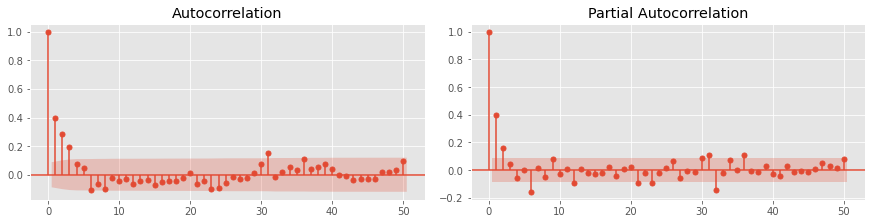

In [15]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(df[['consumo_total']], lags=50,ax=axis[0,0])
plot_pacf(df[['consumo_total']], lags=50,ax=axis[0,1]);


Con el gráfico de autocorrelación y autocorrelación parcial, se observa como para el primero hay señales de que la serie sigue un proceso AR de orden 4 sin embargo, en el gráfico de autocorrelación parcial se puede inducir que la misma sigue un proceso MA de orden 3. 

Dado que la visualización no es tan clara para inferir el tipo de orden de la serie, se realiza una revisión del MSE para un modelo ARIMA evaluando diferentes orden de Autorregresion (AR) y Promedio Móvil (MA):

In [226]:
# Iteración sobre los posibles en un modelo ARIMA(p,d,q), estimando el MSE (test) en cada iteración:

res = pd.DataFrame(columns = ['par_p', 'par_d','par_q','mse_test'])

X = df['consumo_total'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


max_p,max_q,max_d = 6,6,3 # Máximos valores de los parámetros

for p in range(0,max_p):# Cantidad rezagos para un proceso AR
    for q in range(0,max_q): # Cantidad rezagos para un proceso MA
        for d in range(1,max_d): # Cantidad de diferencias parar que la serie sea estacionaria
            try:
                modelo = ARIMA(train, order=(p,d,q)).fit(disp=0)
                pred_ = modelo.forecast(steps=len(test))[0] # predicciones en Test
                error = np.round_(mean_squared_error(test, pred_))
                res = res.append({'par_p': p, 'par_d': d,'par_q': q,'mse_test':int(error)},ignore_index=True)
            except:
                print('No se puede correr el modelo para p:{}, d:{} y q:{}'.format(p,d,q)) # Modelos con error
            

No se puede correr el modelo para p:1, d:2 y q:2
No se puede correr el modelo para p:1, d:2 y q:3
No se puede correr el modelo para p:1, d:1 y q:4
No se puede correr el modelo para p:1, d:2 y q:4
No se puede correr el modelo para p:1, d:1 y q:5
No se puede correr el modelo para p:2, d:2 y q:2
No se puede correr el modelo para p:2, d:2 y q:3
No se puede correr el modelo para p:2, d:1 y q:4
No se puede correr el modelo para p:2, d:2 y q:4
No se puede correr el modelo para p:2, d:1 y q:5
No se puede correr el modelo para p:3, d:1 y q:2
No se puede correr el modelo para p:3, d:2 y q:2
No se puede correr el modelo para p:3, d:1 y q:3
No se puede correr el modelo para p:3, d:2 y q:3
No se puede correr el modelo para p:3, d:1 y q:4
No se puede correr el modelo para p:3, d:2 y q:4
No se puede correr el modelo para p:3, d:1 y q:5
No se puede correr el modelo para p:3, d:2 y q:5
No se puede correr el modelo para p:4, d:1 y q:2
No se puede correr el modelo para p:4, d:1 y q:3
No se puede correr e

In [227]:
# Visualización del error por cada modelo
res.sort_values(by='mse_test').head(7) # para un d>=1

,par_p,par_d,par_q,mse_test
48,5,2,5,47286
25,2,2,5,48205
42,5,1,2,50833
44,5,1,3,50925
46,5,1,4,50992
21,2,1,1,51325
24,2,1,3,51341


Se obtiene que los mejores parámetros para el mejor modelo ARIMA son (0,0,0) es decir, el promedio de la serie original es el mejor modelo (menor MSE) lo cual indica que la serie no presenta órdenes marcados para proceso autoregresivo o de media móvil que disminuyan considerablemente el error con respecto al promedio general (punto de corte de la regresión). Por otro lado, el mejor modelo que considera valores para los parámetros p,d y q con valor >=1 es Autoregresivo de orden 5 (p=5), con diferencia de 2 periodos (d=2) y q = 5 (orden 5 Proceso MA).

Al generar el modelo con las datos completos se observa que para la combinación de algunos de los parámetros obtenidos en train no funcionana para generar un modelo ARIMA con todos los datos, la única combinación con el menor MSE en test que funciona para ello es la del modelo ARIMA(2,1,1).

In [235]:
# Se entrena el modelo ARIMA con los parámetros que menor MSE nos dieron (2,1,1) para todos los datos

modelo_completo = ARIMA(df['consumo_total'], order=(2,1,1)).fit()
print(modelo_completo.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.consumo_total   No. Observations:                  497
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3293.782
Method:                       css-mle   S.D. of innovations            181.872
Date:                Sun, 18 Jul 2021   AIC                           6597.564
Time:                        16:21:06   BIC                           6618.607
Sample:                             1   HQIC                          6605.823
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0392      0.111     -0.353      0.724      -0.257       0.178
ar.L1.D.consumo_total     0.3350      0.044      7.562      0.000       0.248       0.422
ar.L2.D.

###### Predicción vs Valroe real - ARIMA

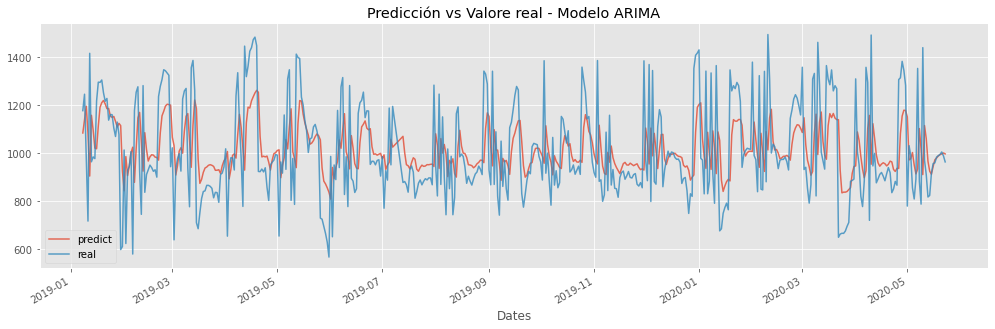

In [244]:
pd.DataFrame({'predict':modelo_completo.predict(typ='levels').values,
              'real': df['consumo_total'].iloc[1:]}).plot(figsize=(17,5), alpha=0.8)
plt.title('Predicción vs Valore real - Modelo ARIMA');

##### Análisis de residuos

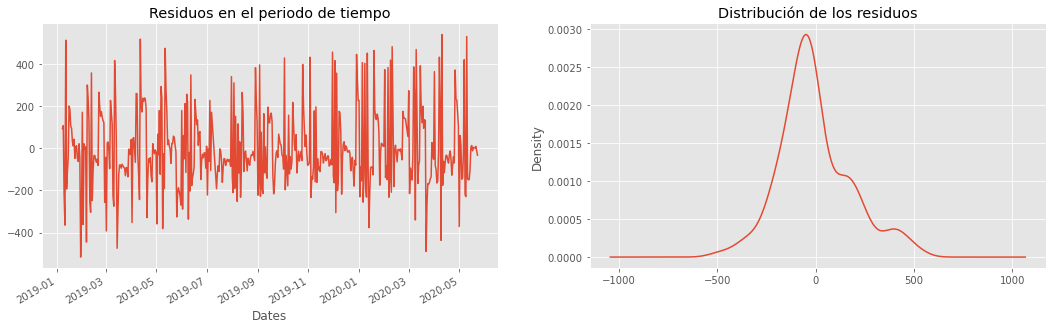

In [284]:
# Análisis de los residuos:

fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,figsize=(15,3))
fig.figsize=(15,5)


modelo_completo.resid.plot(figsize=(18,5),ax=axis[0,0])
axis[0,0].set_title('Residuos en el periodo de tiempo')
modelo_completo.resid.plot(figsize=(18,5),ax=axis[0,1], kind='kde')
axis[0,1].set_title('Distribución de los residuos');


In [286]:
modelo_completo.resid.describe()

count    497.000000
mean      -5.143686
std      183.024299
min     -516.315648
25%     -112.170503
50%      -34.189748
75%      103.668591
max      538.338925
dtype: float64

In [292]:
from scipy.stats import shapiro as sh
print('P_value:',sh(modelo_completo.resid)[1])

P_value: 1.669730909092948e-09


Se observa como los residuos presentan un comportamiento oscilante a lo largo del tiempo, igualmente, se confirma mediante una prueba estadística (Shapiro) que su distribución no se distribuye normal. Así mismo, se evidencia como esta presenta un sesgo negativo (valor de la media de la distribucipon es negativo).

##### Predicciones ARIMA próximos 30 días

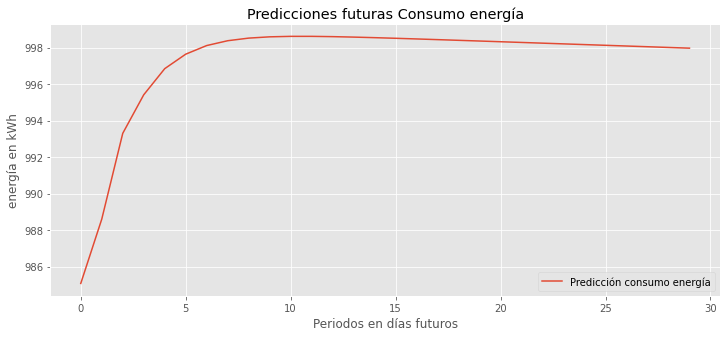

In [272]:
pred_futuras = modelo_completo.forecast(30)[0]
pd.DataFrame(pred_futuras, columns=['Predicción consumo energía']).plot(title='Predicciones futuras Consumo energía',
                                                                                        figsize=(12,5))
plt.ylabel('energía en kWh')
plt.xlabel('Periodos en días futuros');

In [287]:
# Predicciones próximo 30 días:

pred_futuras

array([985.08470597, 988.60799354, 993.31004769, 995.42275744,
       996.85456992, 997.64860889, 998.1212711 , 998.38536864,
       998.5287519 , 998.59869862, 998.6249458 , 998.62493517,
       998.60921442, 998.58407652, 998.55329835, 998.5191408 ,
       998.48295881, 998.44556397, 998.40744254, 998.36888582,
       998.33006832, 998.29109459, 998.25202727, 998.21290387,
       998.17374689, 998.13456977, 998.09538061, 998.05618422,
       998.0169835 , 997.97778019])

### 4.2. Modelo Prophet

In [161]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [162]:
#Se crea el dataframe con las características que requiere Prophet
df1 = pd.DataFrame()
df1['y']=df['consumo_total']
df1['ds']=df.index
df1.head()

,y,ds
Dates,,
2019-01-07,1083.2,2019-01-07
2019-01-08,1176.2,2019-01-08
2019-01-09,1244.6,2019-01-09
2019-01-10,973.9,2019-01-10
2019-01-11,716.1,2019-01-11


In [163]:
#Creamos el marco de datos de la predicción que incluya los datos históricos y 365 días adicionales de predicción 

m1 = Prophet()
m1.fit(df1)

future1 = m1.make_future_dataframe(periods=365, freq='d')
future1.tail(6)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
857,2021-05-18
858,2021-05-19
859,2021-05-20
860,2021-05-21
861,2021-05-22
862,2021-05-23


In [164]:
#Se usa el método predict nos permite asignar a cada fila del marco de datos creado un valor de predicción yhat y los intervalos de incertidumbre
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
857,2021-05-18,1050.690742,797.506347,1300.741649
858,2021-05-19,1033.666877,774.710856,1286.032730
859,2021-05-20,1004.863717,733.024167,1245.752468
860,2021-05-21,1008.511690,737.885555,1258.572380
861,2021-05-22,1020.023204,759.465887,1292.608082
862,2021-05-23,1040.130725,781.467439,1287.477609


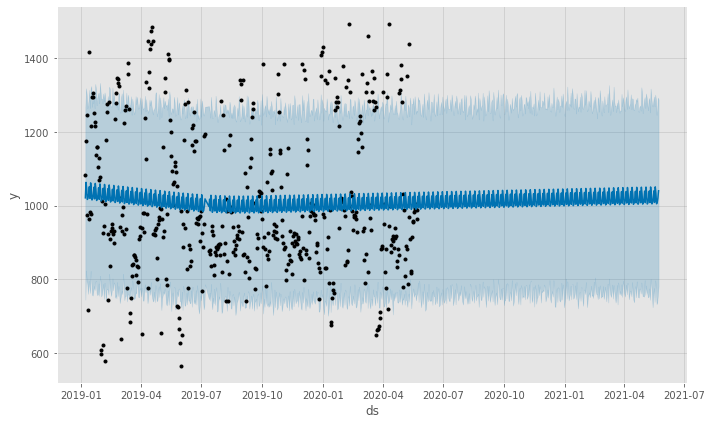

In [165]:
# Se Grafica el pronóstico
m1.plot(forecast1);

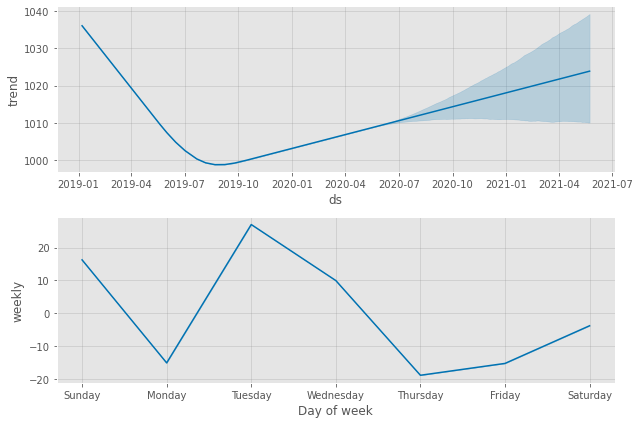

In [138]:
# Se muestran los componentes de la previsión
m1.plot_components(forecast1);

Se observa como existe una tendencia marcada en el aumento del consumo de energía en los días Martes, tendencia que luego tiende a disminuir al acercarse al fin de semana.

In [139]:
from fbprophet.diagnostics import cross_validation

In [140]:
data_cv1 = cross_validation(m1, horizon='60 days')

INFO:fbprophet:Making 9 forecasts with cutoffs between 2019-07-28 00:00:00 and 2020-03-24 00:00:00


In [141]:
data_cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-07-29,941.482224,684.502730,1228.951649,895.8,2019-07-28
1,2019-07-30,964.773285,712.557831,1227.462780,867.4,2019-07-28
2,2019-07-31,961.111606,715.010929,1254.655242,1282.5,2019-07-28
3,2019-08-01,919.873758,665.510492,1186.453949,945.7,2019-07-28
4,2019-08-02,969.453083,714.426970,1234.522596,820.9,2019-07-28


In [142]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

performance_metrics(data_cv1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,48963.093582,221.276057,174.029578,0.168534,0.145759,0.722222
1,7 days,55522.485747,235.632098,183.137609,0.167101,0.145759,0.685185
2,8 days,59362.344073,243.643888,189.062688,0.164465,0.151610,0.666667
3,9 days,51848.545511,227.702757,168.203198,0.145308,0.096305,0.722222
4,10 days,48125.801548,219.375937,162.182985,0.141956,0.108240,0.777778
5,11 days,45921.066234,214.292012,165.504556,0.153296,0.136772,0.796296
6,12 days,44935.031914,211.978848,167.356642,0.159838,0.144808,0.796296
7,13 days,34535.469098,185.837211,150.257539,0.150140,0.139916,0.851852
8,14 days,31308.367273,176.941706,146.307230,0.150379,0.144808,0.833333
9,15 days,36095.152669,189.987243,162.697982,0.164171,0.150114,0.814815


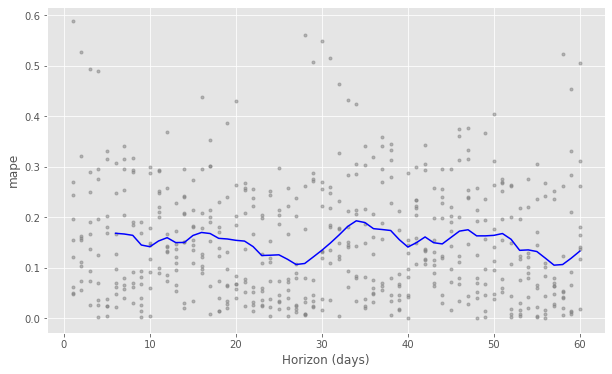

In [143]:
plot_cross_validation_metric(data_cv1, metric='mape');

###   5. Conclusiones